![Exeter Logo](exeter_university_logo.png)

AI-supported/AI-integrated use is permitted in this assessment. I acknowledge the following uses of GenAI tools in this assessment:

- I have used GenAI to help me understand key theories and concepts.
- I have used GenAI tools to proofread and correct grammar or spelling errors.
- I have used GenAI to help bug fix code.

## **Section A. Analysing the Gene Expression Data Set**

(i)

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install nbconvert
!pip install pandoc

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import nbconvert
import pandoc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Loading the gene dataset
gene_data_path = 'gene_file.csv'
gene_data = pd.read_csv(gene_data_path)

# Split into features (X) and target (y), with 'type' as the target
X = gene_data.iloc[:, 2:]  # Gene measurements starting from third column onwards
y = gene_data['type']  # The 'type' column as the target

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting scaled data back to DataFrame for better handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Dataset now includes:
# - X_train_scaled, X_test_scaled: Scaled features for training and testing.
# - y_train, y_test: Corresponding target values for training and testing.

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("First 5 rows of scaled training data:")
print(X_train_scaled[:5])

Shape of X_train: (93, 54675)
Shape of X_test: (24, 54675)
First 5 rows of scaled training data:
[[ 1.23604979  0.26555878  0.47290123 ...  0.31314627 -0.20070374
  -0.65484073]
 [ 0.16217433 -1.84032237 -0.80922999 ...  0.23060196 -0.64276899
   0.73080715]
 [ 0.89533163  0.01341848 -0.379223   ...  0.39402597  0.92435948
  -0.18379479]
 [-0.00787652 -0.34586428  0.38049989 ... -0.18012775 -1.88203437
  -2.12159231]
 [ 0.43401212  0.52983493  4.09287643 ...  0.240402   -0.73032694
   0.2915246 ]]


Scaling the data is important because it ensures all features and values can contribute equally to the analysis. In this particular example with gene expression data. One feature may range from 0 to 1, while another ranges from 0 to 10,000. Scaling therefore makes certain that all the features are on the same scale with a mean of 0 and standard deviation of 1. These values can be compared against each other accurately, improving model performance. Scaling also prevents features with larger values from dominating those with smaller values. 

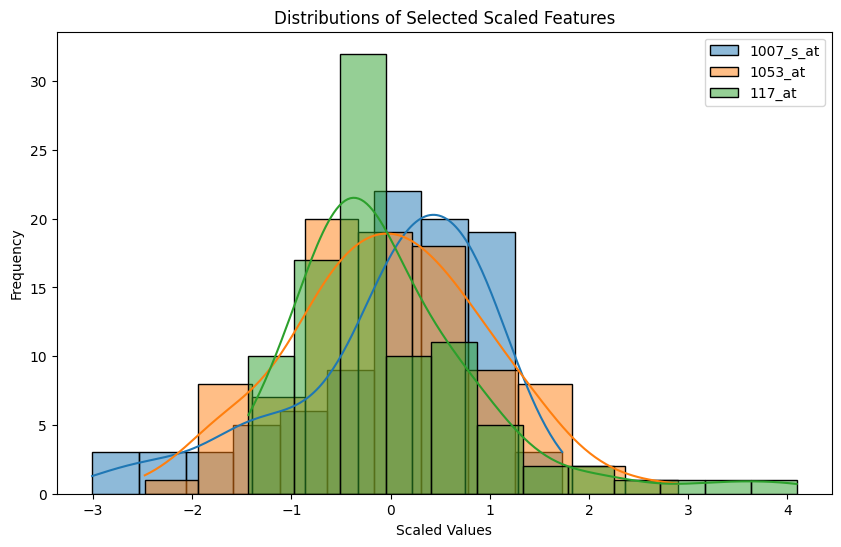

In [4]:
# Ensuring that the data has been scaled accodingly and confirming distribution. 
# Selecting a few features to visualize
sample_features = X.columns[:3]  # First three features

# Plot the scaled distributions
plt.figure(figsize=(10, 6))
for feature in sample_features:
    sns.histplot(X_train_scaled_df[feature], kde=True, label=feature, alpha=0.5)
plt.title('Distributions of Selected Scaled Features')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

(ii) 

In [5]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA to the scaled training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculating the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Computing cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [6]:
# Finding the number of components needed to retain 95% of the variance
optimal_components = (cumulative_explained_variance >= 0.95).argmax() + 1
print(f'Optimal number of principal components to retain 95% variance: {optimal_components}')

Optimal number of principal components to retain 95% variance: 70


In [7]:
# Reducing the dataset to the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_train_reduced = pca_optimal.fit_transform(X_train_scaled)
X_test_reduced = pca_optimal.transform(X_test_scaled)

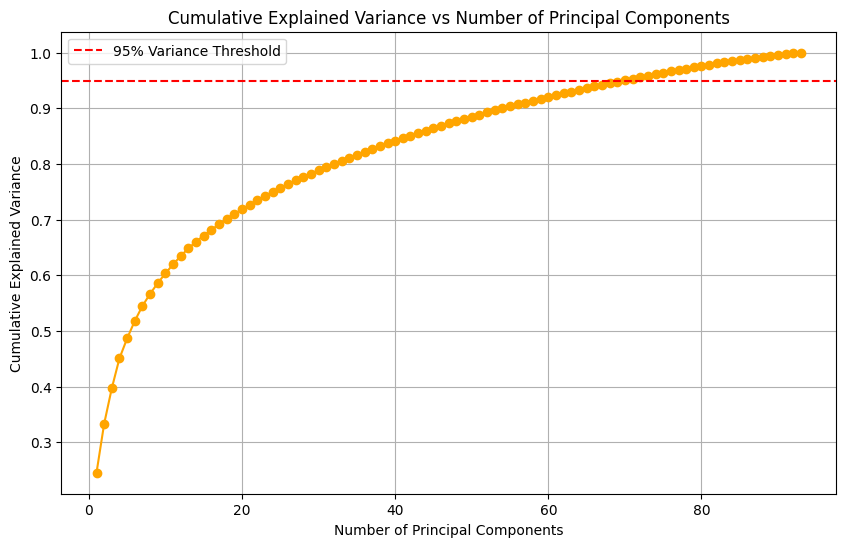

In [8]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='orange')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()
plt.show()

Principl component analysis (PCA) redcues the dimensionality of the dataset, while preserving as much "variability" as possible. It works by identifying patterns in the data and transforming them into a new set of variables, called principle components which are ranked by their importance in explaining variance. Principle components are chosen to retain the majority of the datas variance while minimising the loss of important information. 

In our case above, I have chosen 70 principle components for dimensionality reduction. These 70 principle components account for 95% of the overall variance in the dataset. By reducing to 70 dimensions we are able to elimate noise and redundant features, simplifying the dataset so that downstream analysis or modeling can become compuationally feasible. The plot above shows a clear flattening of the curve around the 70th component, displaying diminishing returns for including additional componenets. Therefore, beyond 70 principle components, the additional variance explained is minimal, justifying my choice.  

(iii)

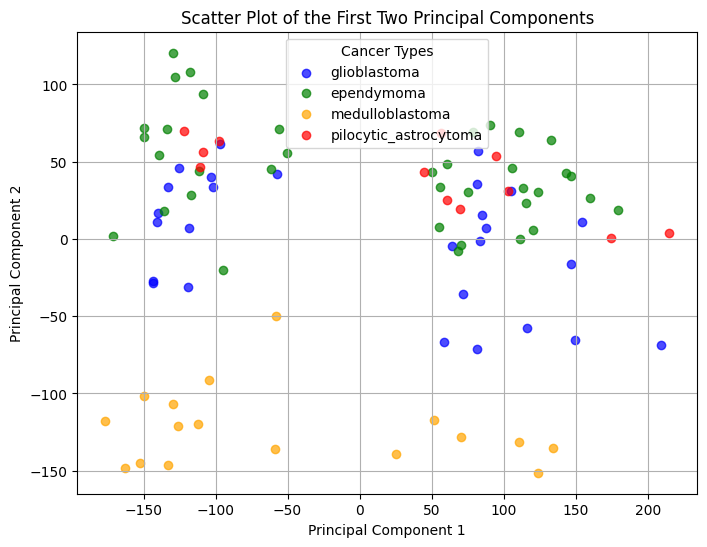

In [9]:
# Further visualising the results of the dimensionality reduction

# Scatter plot with a legend for cancer types
plt.figure(figsize=(8, 6))

# Create a color mapping for each cancer type
color_mapping = {
    'glioblastoma': 'blue',
    'ependymoma': 'green',
    'medulloblastoma': 'orange',
    'pilocytic_astrocytoma': 'red'
}

# Use unique colors for each cancer type
for cancer_type, color in color_mapping.items():
    mask = y_train == cancer_type
    plt.scatter(
        X_train_pca[mask, 0],  # PC1
        X_train_pca[mask, 1],  # PC2
        label=cancer_type,
        color=color,
        alpha=0.7
    )

plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cancer Types")
plt.grid()
plt.show()

The points from some cancer types after dimensionality reduction seem to be in distinct clusters such as medulloblastoma (orange) in the bottom left. This suggests that PCA has separated this cancer type well in the reduced space. However, other types such as ependymoma (green) and glioblastoma (blue) show overlapping areas, which indicates their separation in this space is less distinct. 

The first two principle components capture a significant portion of the variance in the dataset, but not all of it. The overlapping regions show that more principle components are needed to fully separate cancer types. We know from the cumulative explained variance plot that 70 principle components are needed to explain 95% of the variance. 

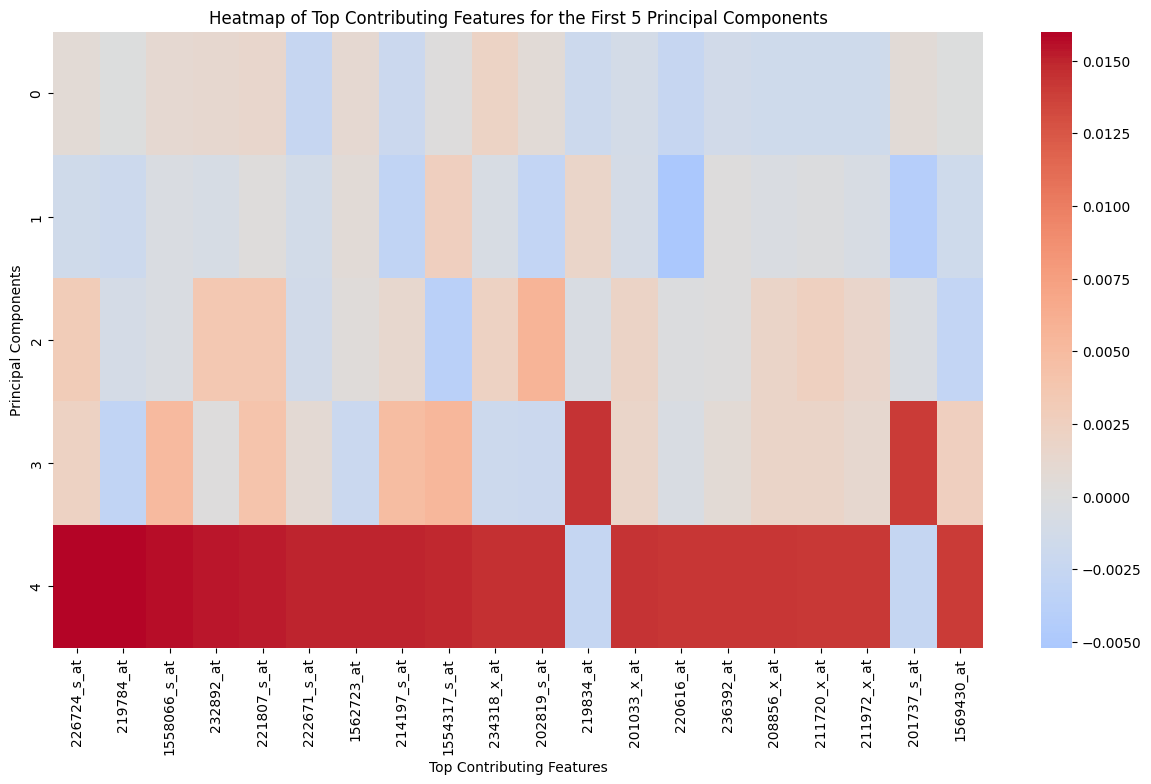

In [10]:
# Create a heatmap
# Selecting the top features contributing to each principal component
top_features = 20  
components = pd.DataFrame(pca.components_[:5], columns=X.columns)

# Keeping only the top features for each principal component
top_features_indices = components.abs().max().sort_values(ascending=False).index[:top_features]
filtered_components = components[top_features_indices]

# Creating a heatmap with the filtered features
plt.figure(figsize=(15, 8))
sns.heatmap(filtered_components, cmap='coolwarm', center=0)
plt.title('Heatmap of Top Contributing Features for the First 5 Principal Components')
plt.xlabel('Top Contributing Features')
plt.ylabel('Principal Components')
plt.show()

The red and orange colours represent the high posititve contribution of a feature to a principle component. The blue colours represent a high negative contribution of a feature to a principle component. For example, 226724_s_at (column 1) has a strong negative contribution to PC1. 

Features with strong red or blue integnsifies are most influential for their respective principal components. For instance, PC3 is influenced heavily by 219784_at (column 2) and 219834_at (column 12). This explains which genes are driving the variability in each principle component.    

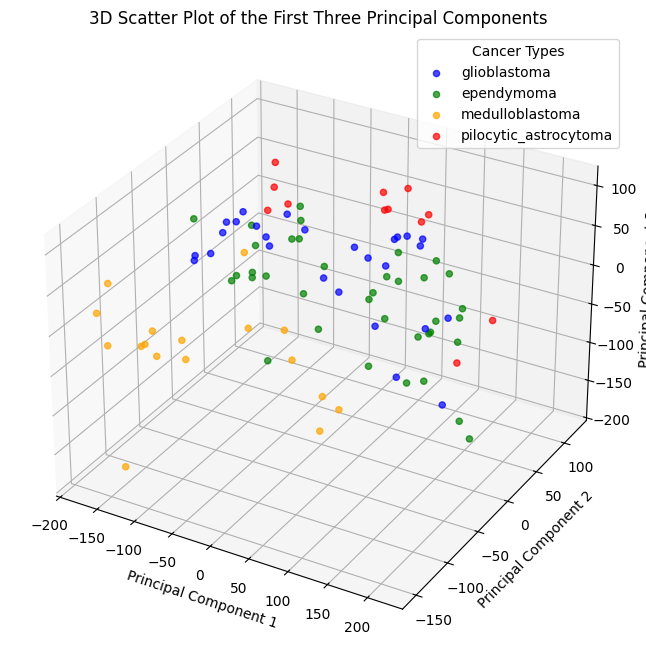

In [11]:
#creating 3D scatterplot of 3 principle components
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cancer type
for cancer_type, color in color_mapping.items():
    mask = y_train == cancer_type
    ax.scatter(
        X_train_pca[mask, 0],  # PC1
        X_train_pca[mask, 1],  # PC2
        X_train_pca[mask, 2],  # PC3
        label=cancer_type,
        color=color,
        alpha=0.7
    )
# Set plot titles and labels
ax.set_title('3D Scatter Plot of the First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# Add a legend
ax.legend(title='Cancer Types')
# Show the plot
plt.show()

From the 3D scatterplot shown above. We find that Medulloblastoma (orange) points are mostly clustered in the bottom left region of the plot, with limited overlap with other cancer types. This therefore suggests that medulloblastoma samples have distinct gene expression patterns which PCA captures well. 

Pilocytic Astrocytoma (red) points form a loose cluster towards the top right region with some overlap with ependymoma (green) and glioblastoma (blue) points. This displays partial separability, yet there are shared features with other cancer types. These overlaps show glioblastoma and ependymoma especially might share biological features or similarities in their gene expression profiles.  



(iv)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Applying PCA to the scaled training and testing data
pca_optimal = PCA(n_components=70)  # Chosen number of components from prev PCA
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

# Train the logistic regression model on the PCA-transformed training data
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_pca)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [13]:
np.mean(y_test == y_pred)

np.float64(0.875)

I have chosen the accuracy performance metric to evaluate the effectivness of my logistic regression model. This function is from sklearn.metrics and it helps compute the accuracy of the logistic regression model using the following equation. The accuracy measures the proportion of correctly classified samples out of the total number of samples. 

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

In this case, y_test refers to the true labels for the test set and y_pred is the predicted labels from the logistic regression model. The calculated accuracy score is 88% or 0.875. This means that 88% of the predictions made by the model on the test dataset were correct. 

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

           ependymoma       1.00      0.89      0.94         9
         glioblastoma       0.78      1.00      0.88         7
      medulloblastoma       1.00      0.80      0.89         5
pilocytic_astrocytoma       0.67      0.67      0.67         3

             accuracy                           0.88        24
            macro avg       0.86      0.84      0.84        24
         weighted avg       0.89      0.88      0.88        24



This classification report complements the accuracy performance metric showing the precision of the predicitions. 

As we can see for ependymoma and medulloblastoma, they both have a prediction score of 1 showing all predicted ependymoma and medulloblastoma samples were correct. Futhermore, the f1-scores were high respectively with 0.94 and 0.89 showing the model performed well overall for these cancer types. 

Glioblastoma had a precision score of 0.78, so the model predicted 78% of all actual glioblastoma samples. Its f1-score was 0.88, showing the model has a good balance position for glioblastoma. Glioblastoma had a recall score of 1. Therefore, the model identified all actual glioblastoma samples. 

Pilocytic astrocytoma had a precision score of 67% which implies 67% of predicted pilocytic astrocytoma samples were correct. The f1-score is 0.67 and so the model struggled with this cancer type. However, there were only 3 actual pilocytic astrocytoma samples shown by the support value '3'. This may have impacted performance. 

## **Section B. Sea Level Change Modelling** 

In [15]:
# Loading the data
file_path = 'sealevel.csv'
sealevel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
sealevel_data.head()

,date,Location,Change in Mean Sea Level (mm)
0,2000-01-01,Bering Sea,-37.856667
1,2000-01-01,Mediterranean,-35.506667
2,2000-01-01,World,2.513333
3,2000-02-01,Bering Sea,-55.023333
4,2000-02-01,Mediterranean,-39.473333


In [16]:
# Converting the 'date' column to datetime format
sealevel_data['date'] = pd.to_datetime(sealevel_data['date'])

# Checking for missing values
missing_values = sealevel_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = sealevel_data.duplicated().sum()

# Display summary of checks
missing_values, duplicate_rows

(date                             0
 Location                         0
 Change in Mean Sea Level (mm)    0
 dtype: int64,
 np.int64(0))

In [17]:
# Making subsets for each location
bering_sea_data = sealevel_data[sealevel_data['Location'] == 'Bering Sea']
mediterranean_data = sealevel_data[sealevel_data['Location'] == 'Mediterranean']
world_data = sealevel_data[sealevel_data['Location'] == 'World']

# Display the first few rows of each subset to confirm
bering_sea_data.head(), mediterranean_data.head(), world_data.head()

(         date    Location  Change in Mean Sea Level (mm)
 0  2000-01-01  Bering Sea                     -37.856667
 3  2000-02-01  Bering Sea                     -55.023333
 6  2000-03-01  Bering Sea                     -61.090000
 9  2000-04-01  Bering Sea                     -63.840000
 12 2000-05-01  Bering Sea                     -41.256667,
          date       Location  Change in Mean Sea Level (mm)
 1  2000-01-01  Mediterranean                     -35.506667
 4  2000-02-01  Mediterranean                     -39.473333
 7  2000-03-01  Mediterranean                     -86.206667
 10 2000-04-01  Mediterranean                      16.060000
 13 2000-05-01  Mediterranean                     -41.740000,
          date Location  Change in Mean Sea Level (mm)
 2  2000-01-01    World                       2.513333
 5  2000-02-01    World                      -1.920000
 8  2000-03-01    World                      -2.353333
 11 2000-04-01    World                      -5.420000
 14 2000-

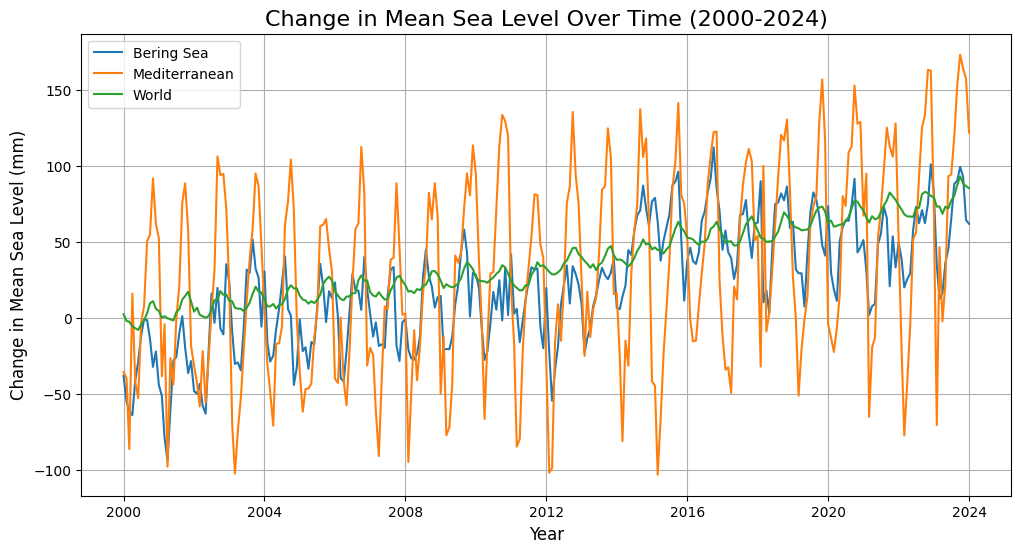

In [18]:
# Visualising Data before building regression model
plt.figure(figsize=(12, 6))
plt.plot(bering_sea_data['date'], bering_sea_data['Change in Mean Sea Level (mm)'], label="Bering Sea")
plt.plot(mediterranean_data['date'], mediterranean_data['Change in Mean Sea Level (mm)'], label="Mediterranean")
plt.plot(world_data['date'], world_data['Change in Mean Sea Level (mm)'], label="World")

# Add labels, title, and legend
plt.title("Change in Mean Sea Level Over Time (2000-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Change in Mean Sea Level (mm)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### **Regression Model**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Time column to show months since Jan 2000
sealevel_data['time'] = (sealevel_data['date'] - pd.Timestamp("2000-01-01")).dt.days // 30

# Split data by location 
locations = ["Bering Sea", "Mediterranean", "World"]
models = {}
results = {}

for location in locations:
# Subset data for the location
    loc_data = sealevel_data[sealevel_data['Location'] == location]
    X = loc_data[['time']].values
    y = loc_data['Change in Mean Sea Level (mm)'].values
    
# Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

#Storing the model
    models[location] = model
    
# Making predictions and calculate R^2
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[location] = {"R²": r2}

# Displaying the R² statistics in a table format
r2_table = pd.DataFrame({location: [results[location]["R²"]] for location in locations}, index=["R²"])
r2_table.T  # Transpose for better readability

,R²
Bering Sea,0.526528
Mediterranean,0.136573
World,0.937769


After fitting our linear regression model for the sea level data, we evaluate the effectiveness of the model for explaining the changes in the mean sea level in these three locations over time. The R squared value represents the proportion of the variance in the dependent variable (sea level change) that is explained by the independent variable (time) in this regression model. 

Bering Sea shows an R squared value of 0.5265 which suggests the model explains around 52.7% of the variability in the change in sea levels in the Bering Sea using time. The model captures the overall trend but almost half of the variability is unexplained. This could imply that other external factors such as seasonal patterns or local climatic events are influencing the sea-level changes which the model cannot account for. 

The Mediterranean Sea has an R squared value of 0.1365 and therefore the model explains 13.7% of the variability in the change in sea levels in the Mediterranean. The model struggles to explain sea-level changes in this location, which suggests that time by itself is a poor predictor. 

The World R squared value is 0.9377. The model explains around 93.8% of the variability in the global change in sea levels using time. The model fits very well for the world sea level data and captures most of the trend on a global scale. This is likely due to aggregated effects as there is reduced variability compared to regional data. 

#### **Visualising the Linear Regression Model**

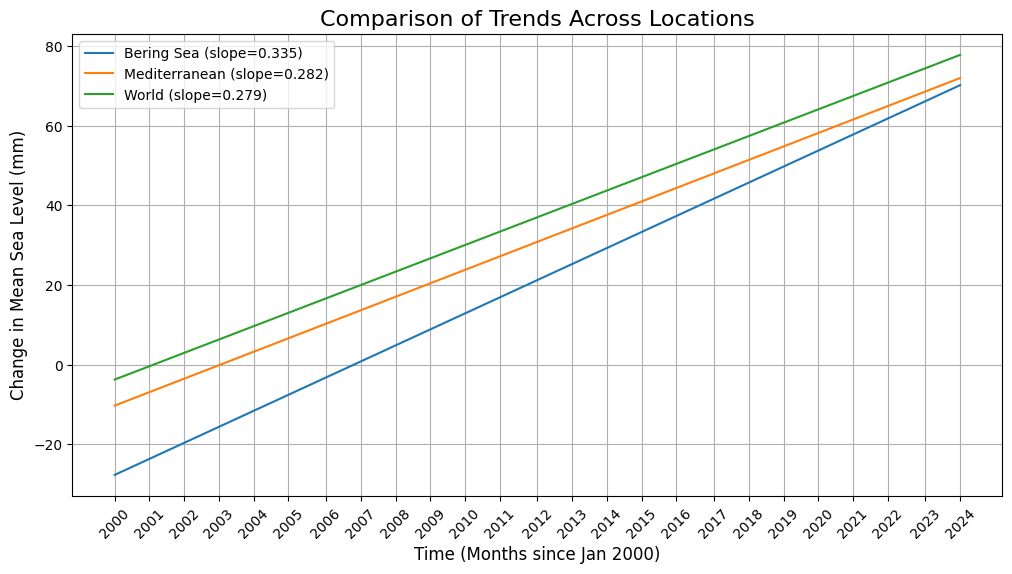

In [20]:
# Comparing the trends across locations using regression lines
plt.figure(figsize=(12, 6))

# Defining a time range for creating trend lines
time_range = np.linspace(sealevel_data['time'].min(), sealevel_data['time'].max(), 300)

#for loopb
for location in locations:
    loc_data = sealevel_data[sealevel_data['Location'] == location]
    X = loc_data[['time']].values
    y = loc_data['Change in Mean Sea Level (mm)'].values
    
    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Creating trend line
    trend_line = model.coef_[0] * time_range + model.intercept_
    
    # Plot trend line
    plt.plot(time_range, trend_line, label=f"{location} (slope={model.coef_[0]:.3f})")

# Modify x-axis to display years instead of months
start_year = sealevel_data['date'].min().year
end_year = sealevel_data['date'].max().year
years = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq="YS")

# Map time (months since 2000) to actual years
years_labels = [year.year for year in years]
years_time = [(pd.Timestamp(year) - pd.Timestamp("2000-01-01")).days // 30 for year in years]

plt.xticks(years_time, years_labels, rotation=45)



# Add labels, title, and legend
plt.title("Comparison of Trends Across Locations", fontsize=16)
plt.xlabel("Time (Months since Jan 2000)", fontsize=12)
plt.ylabel("Change in Mean Sea Level (mm)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The Bering Sea trend line has the steepest slope (blue) indicating the fastest increase in sea level change between the 3 locations. This may suggest the Bering Sea could be exepriencing fast local environmental changes such as melting sea ice or increased precipitation leading to a surge in the mean sea level. The Mean Sea Level has changed from -25mm in the year 2000 and risen by 70mm by 2024 with an overall increase of 95mm for the Bering Sea.  

The Mediterranean Sea (orange) has a slope of gradient 0.282 which is less steep than the Bering Sea but is positive, indicating a slower rate of inrease in sea level changes. Factors such as evaporation or regional climate changing patterns may have moderated the increase in sea level changes. The Mean Sea Level has increased by roughy 80mm from the year 2000 to 2024 for the Mediterranean Sea. 

The World slope (green) is much smoother than the Mediterranean Sea and Bering Sea, reflecting global averages. This suggests that local fluctuations such as shown by the Bering Sea are averaged out on a global scale. We can see that the change in mean sea level on a global scale has increases from around -3mm in 2000 to around 77mm in 2024, wtih an overall increase of 80mm over the 24 years.  

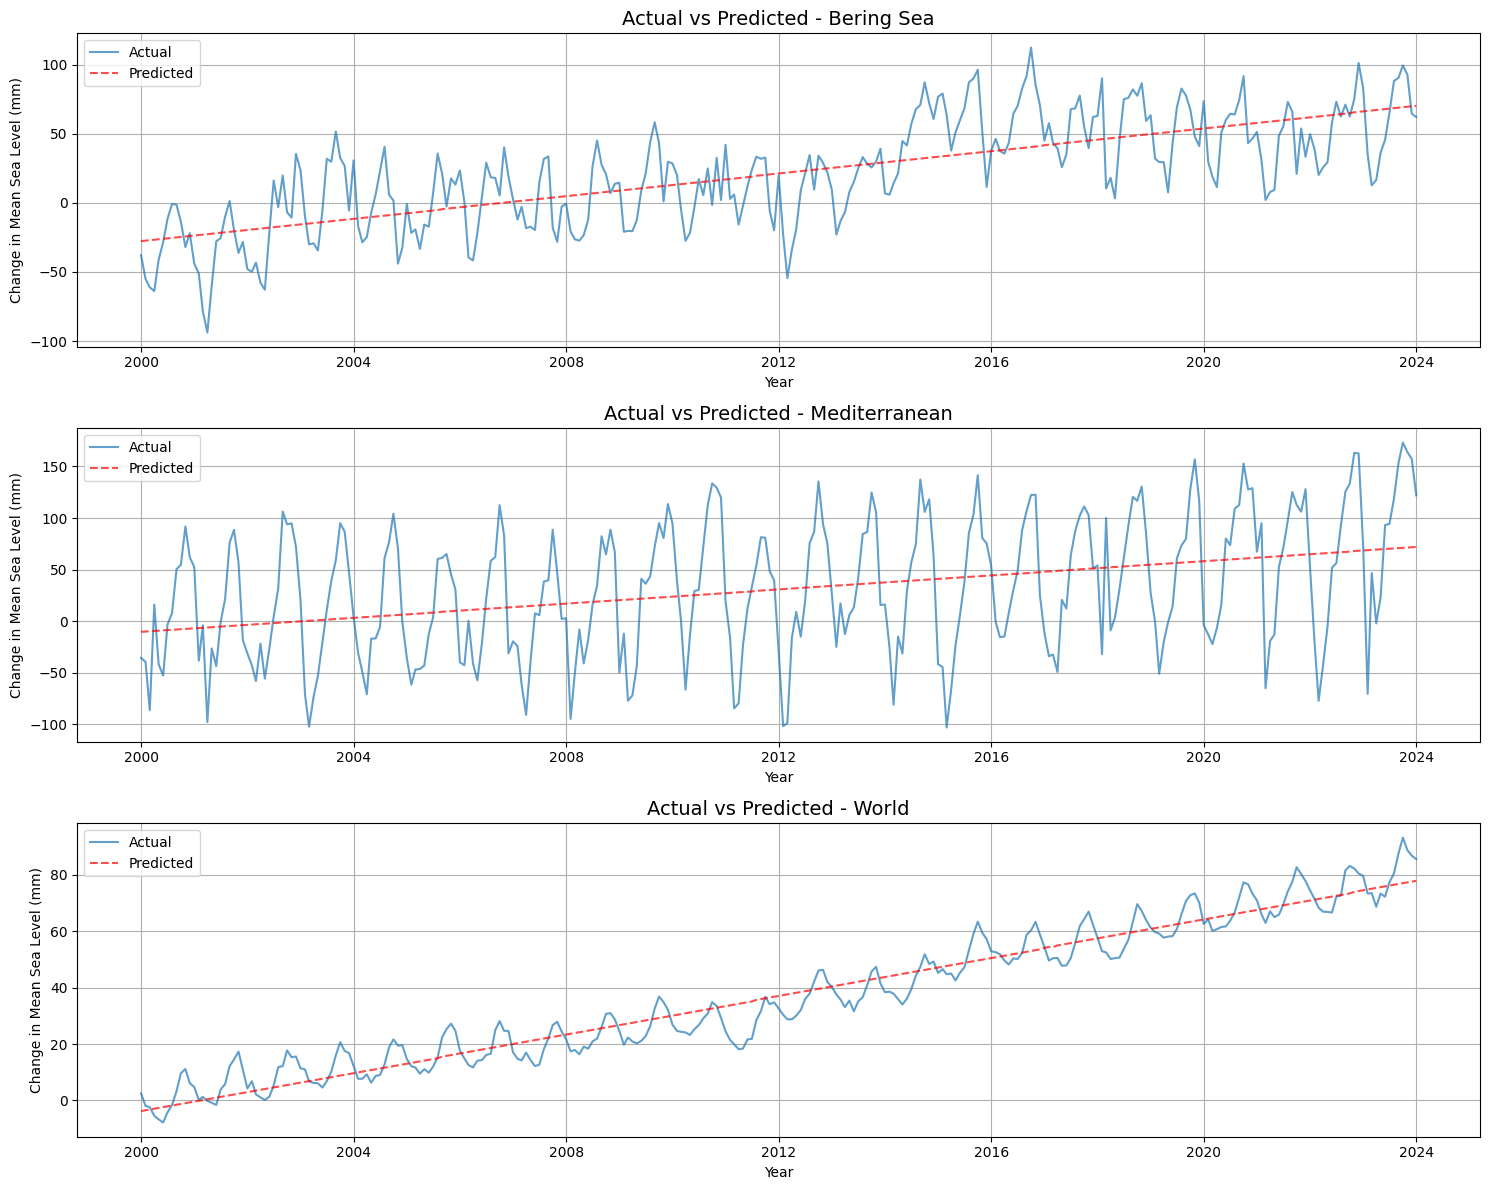

In [21]:
# Plot actual vs predicted values for each location
plt.figure(figsize=(15, 12))

for i, location in enumerate(locations, 1):
    # Subset data for the location
    loc_data = sealevel_data[sealevel_data['Location'] == location]
    X = loc_data[['time']].values
    y = loc_data['Change in Mean Sea Level (mm)'].values
    y_pred = models[location].predict(X)
    
    # subplots for each location
    plt.subplot(3, 1, i)
    plt.plot(loc_data['date'], y, label='Actual', alpha=0.7)
    plt.plot(loc_data['date'], y_pred, label='Predicted', linestyle='--', color='red', alpha=0.7)
    plt.title(f"Actual vs Predicted - {location}", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Change in Mean Sea Level (mm)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In the first Actual vs Predicted graph following the Bering Sea, we can see that the predicted line follows the general trend of the actual data shown but fails to capture points of high variability. The actual data shows some significant fluctuations that the model fails to explain. 

The Mediterranean Sea graph's predicted line is relatively flat compared to the actual data which has a great amount of volatility and irreguler patterns. The model struggles to capture the relationship between time and sea-level changes as mentioned with its low R squared value of 0.1365. This could suggest that other factors such as local climate dyanmics are better predictors than time for this location.

For the World Sea level, the predicted line closely matches the actual data which few deviations. This therefore suggests that the model fits this data well compared to the other regional locations. The model is able to capture the long-term trend in sea-level changes effectively. 

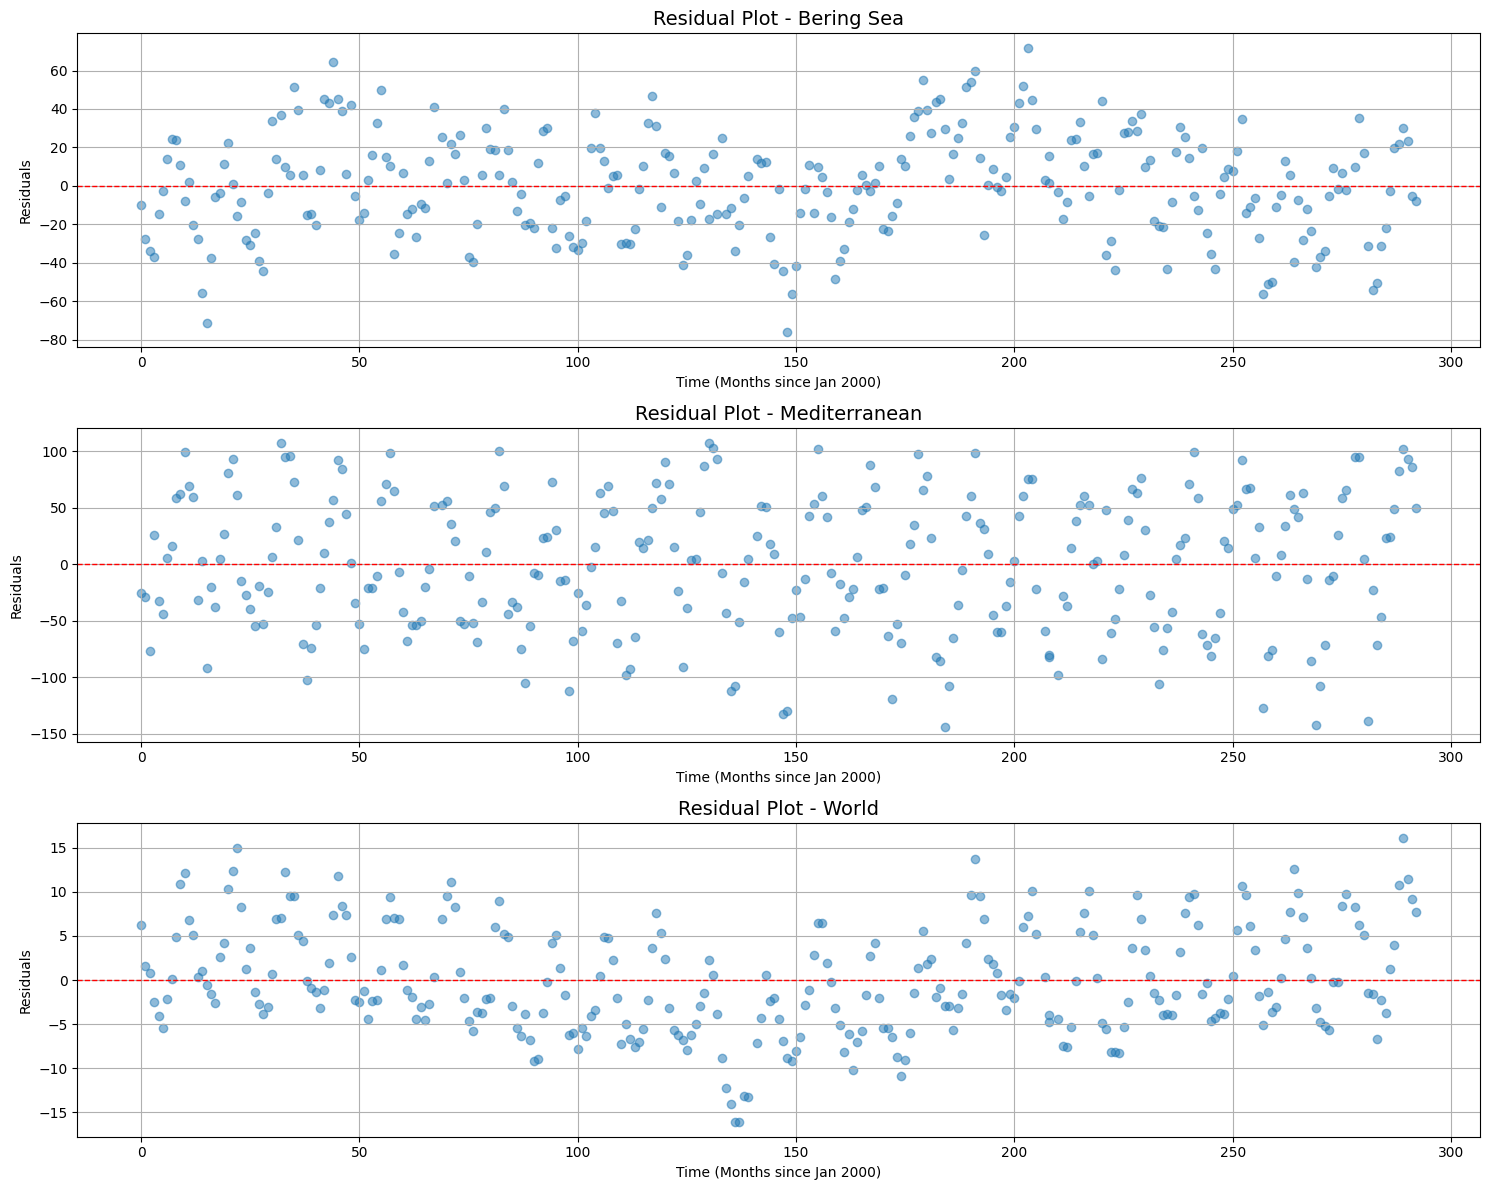

In [22]:
# Plot residuals for each location
plt.figure(figsize=(15, 12))

for i, location in enumerate(locations, 1):
    # Subset data for the location
    loc_data = sealevel_data[sealevel_data['Location'] == location]
    X = loc_data[['time']].values
    y = loc_data['Change in Mean Sea Level (mm)'].values
    y_pred = models[location].predict(X)
    residuals = y - y_pred
    
    # Create subplot for each location
    plt.subplot(3, 1, i)
    plt.scatter(loc_data['time'], residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Residual Plot - {location}", fontsize=14)
    plt.xlabel("Time (Months since Jan 2000)")
    plt.ylabel("Residuals")
    plt.grid(True)

plt.tight_layout()
plt.show()

The residual plot for the Bering Sea shows some structure with a few clusters and patterns over time. However, the spread of the residuals is wide, therefore indicating the model is struggling to capture the variability in the data. 

The residual plot for the Mediterranean Sea displays an even wider spread of data points distriubted from zero, indicating a poor model fit which is confirmed by the models r squared value of 0.1365. Looking at the residual Y axis and how the scale changes between the 3 subplots, it is clear this is the worst performing model. Time as the sole predictor for this model is inefficient and therefore a more complex model is needed. Overall for the Bering Sea and Mediterranean, the residual plots shows that the model is underperforming and missing patterns, likely because of unnaccounted seasonal patterns or regional factors making it hard to predict sudden changes in sea level for these locations. 

The residual plot for the World shows a small spread around 0 with less randomness affirming the model's strong performance for global trends. 

## **Section C. Power Demand Clustering**

#### 1. Data-processing

(i)

In [23]:
#load data
file_path = 'January_2013.csv'
data = pd.read_csv(file_path)

#Converting the 'date' column to datetime object for wrangling
data['Date'] = pd.to_datetime(data['Date'])

#We need to divide the power recorded in each 10 min interval by its corresponding daily max. 
#First exclude first two columns from data wrangling. 
power_data = data.iloc[:, 2:]

#Normalise each row by its maximum value
normalised_power_data = power_data.div(power_data.max(axis=1), axis=0)

#Adding Date and Substation ID columns back to normalised dataset
normalised_data = pd.concat([data.iloc[:, :2], normalised_power_data], axis=1)

#Displaying first two rows of the normalised data
print(normalised_data.head(2))

        Date  Substation     00:00     00:10     00:20     00:30     00:40  \
0 2013-01-03      511016  0.596742  0.602990  0.614149  0.610801  0.575764   
1 2013-01-03      511029  0.624220  0.722846  0.754057  0.643571  0.802122   

      00:50     01:00     01:10  ...     22:20     22:30     22:40     22:50  \
0  0.554787  0.565276  0.535148  ...  0.757867  0.769917  0.737782  0.710333   
1  0.834582  0.843321  0.818976  ...  0.655119  0.630774  0.647940  0.640762   

      23:00     23:10     23:20     23:30     23:40     23:50  
0  0.675073  0.686454  0.680875  0.671502  0.635126  0.603883  
1  0.637328  0.659800  0.631086  0.634519  0.687266  0.680400  

[2 rows x 146 columns]


(ii)

In [24]:
#Removing Observations (power data recordings) obtained during the weekends

#Determining day of the week (Monday is 0, Sunday is 6)
normalised_data['DayOfWeek'] = normalised_data['Date'].dt.dayofweek

#Removing rows where the day of week is Saturday (5) or Sunday (6)
filtered_data = normalised_data[(normalised_data['DayOfWeek'] !=5) & (normalised_data['DayOfWeek'] !=6)]

# Ensure no weekend days are present in the filtered dataset
weekend_days_present = filtered_data['DayOfWeek'].isin([5, 6]).any()
print("Are there any weekends remaining in the filtered data?", weekend_days_present)

Are there any weekends remaining in the filtered data? False


In [25]:
#Dropping 'DayOfWeek' column
filtered_data = filtered_data.drop(columns=['DayOfWeek'])

(iii)

In [26]:
#Grouping the filtered normalised data by the Substation ID and calculating the mean for each 10-min interval column
#Excluding 'date' column
average_profiles = filtered_data.drop(columns=['Date']).groupby('Substation').mean()

# Display the first two rows of the processed data
print(average_profiles.head(2))

               00:00     00:10     00:20     00:30     00:40     00:50  \
Substation                                                               
511016      0.591735  0.596037  0.577479  0.567874  0.560374  0.552640   
511029      0.571221  0.641650  0.672472  0.695803  0.752872  0.740979   

               01:00     01:10     01:20     01:30  ...     22:20     22:30  \
Substation                                          ...                       
511016      0.544367  0.531079  0.523659  0.511897  ...  0.760142  0.742951   
511029      0.729712  0.710950  0.700275  0.685422  ...  0.747371  0.720871   

               22:40     22:50     23:00     23:10     23:20     23:30  \
Substation                                                               
511016      0.721639  0.714996  0.709921  0.694241  0.675090  0.654038   
511029      0.686436  0.678937  0.660703  0.643323  0.630763  0.615327   

               23:40     23:50  
Substation                      
511016      0.629824  0

#### 2. Hierarchical Clustering

(i)

In [27]:
from scipy.spatial.distance import pdist, squareform

# Computing the pairwise distances (e.g., using Euclidean distance)
distance_matrix = pdist(average_profiles, metric='euclidean')

# Converting the pairwise distances into a square matrix format
distance_matrix_square = squareform(distance_matrix)

# Creating a DataFrame for better readability
distance_matrix_df = pd.DataFrame(
    distance_matrix_square,
    index=average_profiles.index,
    columns=average_profiles.index  
)

# Display the first few rows of the distance matrix
print(distance_matrix_df.head())

Substation    511016    511029    511030    511033    511034    511035  \
Substation                                                               
511016      0.000000  2.319251  1.542554  2.381844  1.538641  1.194972   
511029      2.319251  0.000000  1.315388  3.870223  2.759208  1.673754   
511030      1.542554  1.315388  0.000000  3.030854  2.033053  0.541533   
511033      2.381844  3.870223  3.030854  0.000000  2.052813  2.683628   
511034      1.538641  2.759208  2.033053  2.052813  0.000000  1.748181   

Substation    511079    511150    511151    511188  ...    563723    563728  \
Substation                                          ...                       
511016      1.780515  4.481079  4.460746  4.146205  ...  2.049032  2.527930   
511029      2.269583  5.340843  4.782965  4.729184  ...  2.291343  2.324310   
511030      1.209075  4.700422  4.289283  4.182574  ...  1.325545  1.697856   
511033      2.298912  2.384302  2.821635  2.359959  ...  2.653002  3.063197   
511034 

C:\Users\joshh\anaconda3\envs\MTHM503-Practical\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\joshh\anaconda3\envs\MTHM503-Practical\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


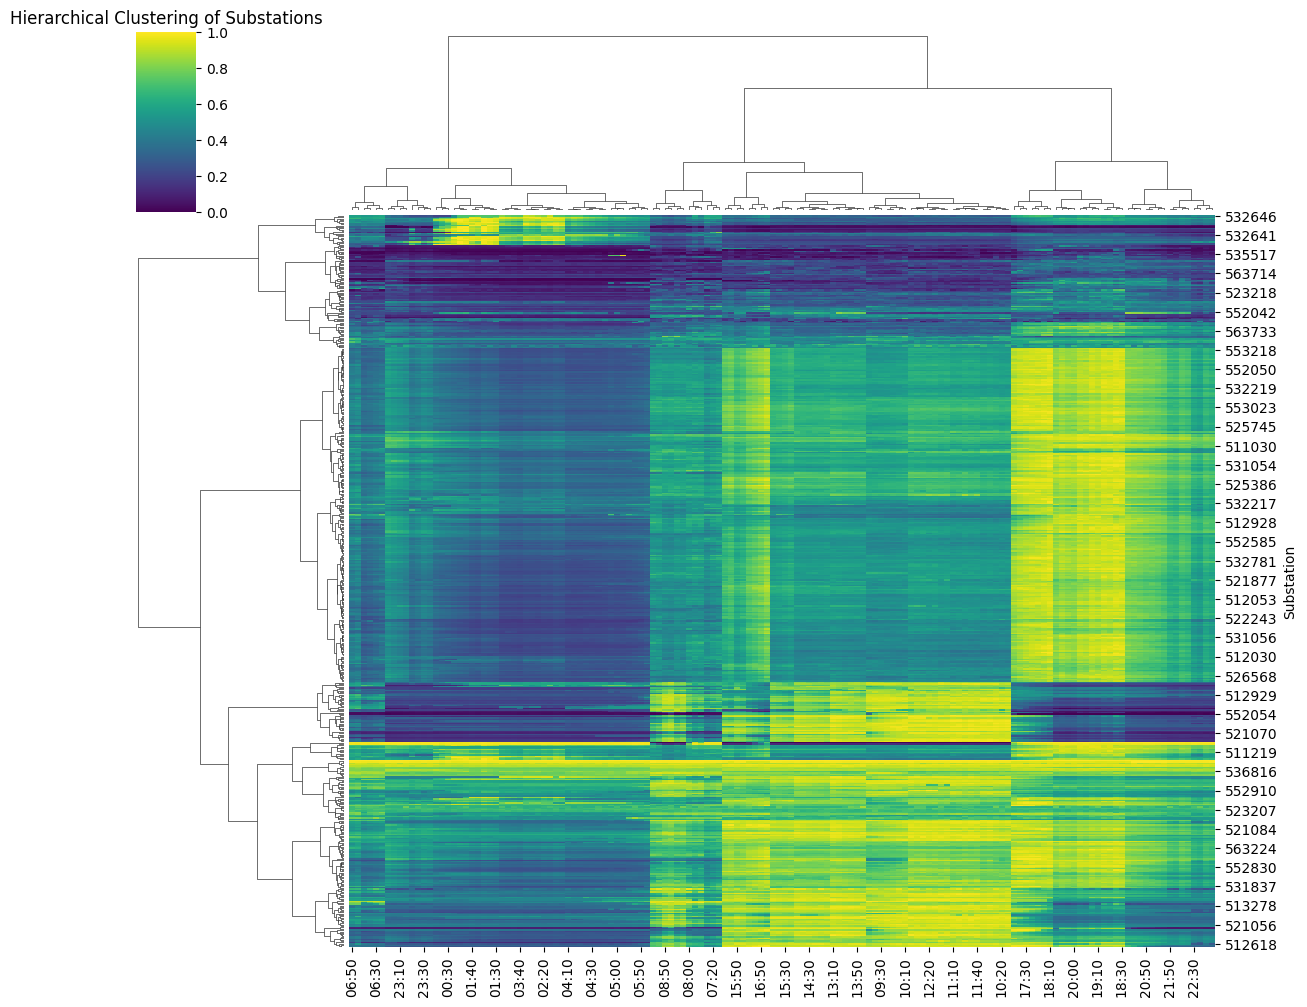

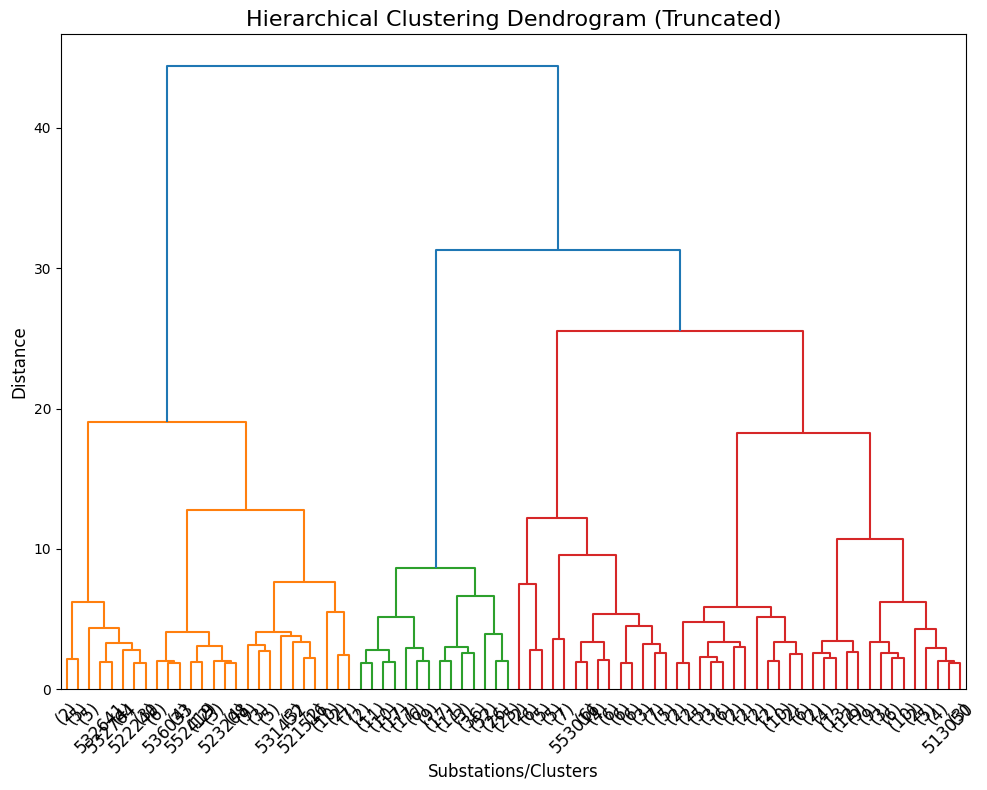

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(distance_matrix, method='ward')
sns.clustermap(
    average_profiles,          
    method='ward',            
    metric='euclidean',        
    cmap='viridis',            
    figsize=(12, 10),          
    standard_scale=1           
)

plt.title("Hierarchical Clustering of Substations")
plt.show()

plt.figure(figsize=(10, 8))
dendrogram(
    linkage_matrix,
    labels=average_profiles.index,
    truncate_mode='lastp',  # Showing only the last p clusters
    p=80,  # Display the top 80 clusters
    leaf_rotation=45,  # Rotate x-axis labels for readability
    leaf_font_size=12  # Increase font size
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)', fontsize=16)
plt.xlabel('Substations/Clusters', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

Using Euclidean Distance to measure the straight-line distance between points, I have calculated the pairwise distances of the average profiles. For the hierarhical clustering, I have produced the dendrogram with heatmap shown above using 'Ward's' linkage method which minimises the variance within clusters. This therefore produces compact clusters that are more meaningful.  

(ii)

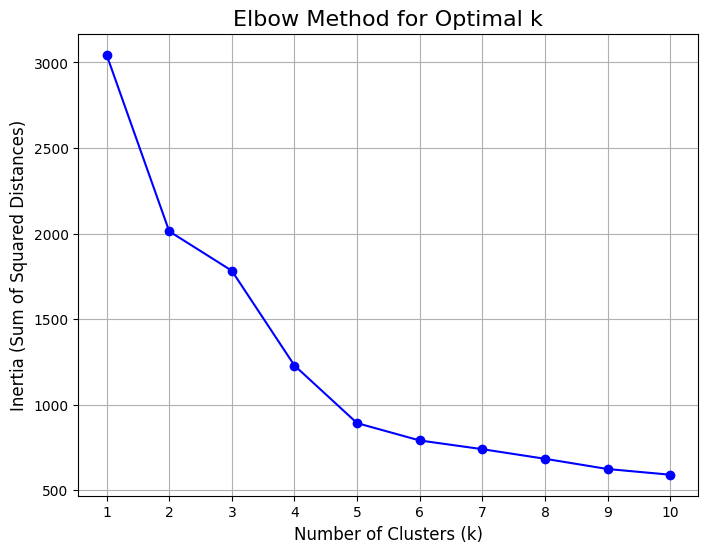

In [29]:
#K-means clustering analysis to work out number of clusters
from sklearn.cluster import KMeans

numeric_data = average_profiles


cluster_range = range(1, 11)  
inertia_values = [] 
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

# Choosing 5 clusters
n_clusters = 5 

# Agglomerative Clustering
clustering = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward',
    metric='euclidean'
)
clustering.fit(average_profiles)

# Assigning cluster labels to each substation
average_profiles['Cluster'] = clustering.labels_

# Step 4: Count the number of substations in each cluster
cluster_counts = average_profiles['Cluster'].value_counts()

# Print the results
print("Number of substations in each cluster:")
print(cluster_counts)

# Display the substations and their cluster labels
print("\nSubstations with their cluster labels:")
print(average_profiles[['Cluster']])

Number of substations in each cluster:
Cluster
2    242
0    127
1     75
3     69
4     22
Name: count, dtype: int64

Substations with their cluster labels:
            Cluster
Substation         
511016            0
511029            3
511030            2
511033            0
511034            3
...             ...
563737            2
564229            0
564230            0
564368            0
564444            1

[535 rows x 1 columns]


(iii)

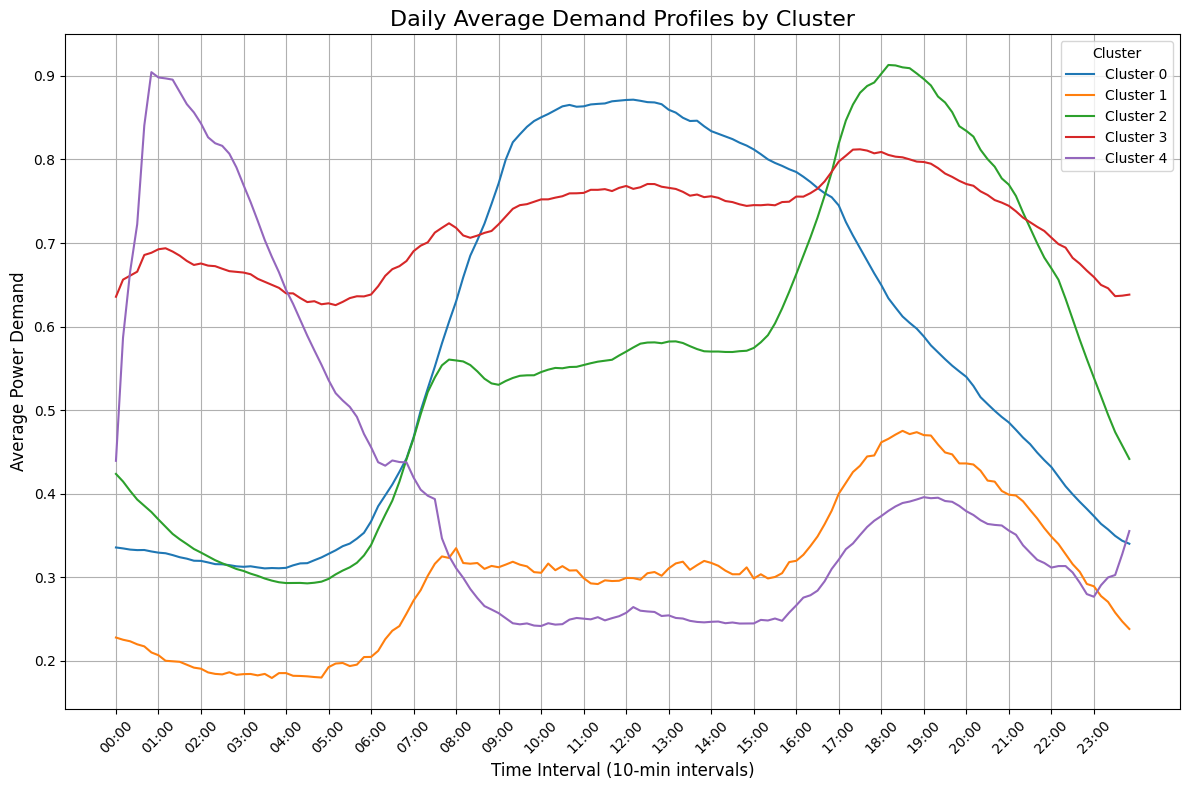

In [31]:
#Dropping cluster column in order to work out the averages
average_profiles_numeric = average_profiles.drop(columns=['Cluster'])

# Group by cluster and calculate mean demand profile for each cluster
cluster_means = average_profiles_numeric.groupby(average_profiles['Cluster']).mean()

# Plotting the demand profiles for each cluster
plt.figure(figsize=(12, 8))

for cluster_id in cluster_means.index:
    plt.plot(
        cluster_means.columns,         # Time intervals - 10min (columns)
        cluster_means.loc[cluster_id], # Average power demand for the cluster
        label=f"Cluster {cluster_id}"
    )


x_ticks = list(range(0, len(cluster_means.columns), 6))  # Adjusting the step to every 6 intervals so that the 
x_labels = [cluster_means.columns[i] for i in x_ticks]

plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45, fontsize=10)  # Rotating for better alignment
plt.title("Daily Average Demand Profiles by Cluster", fontsize=16)
plt.xlabel("Time Interval (10-min intervals)", fontsize=12)
plt.ylabel("Average Power Demand", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Cluster Evaluations

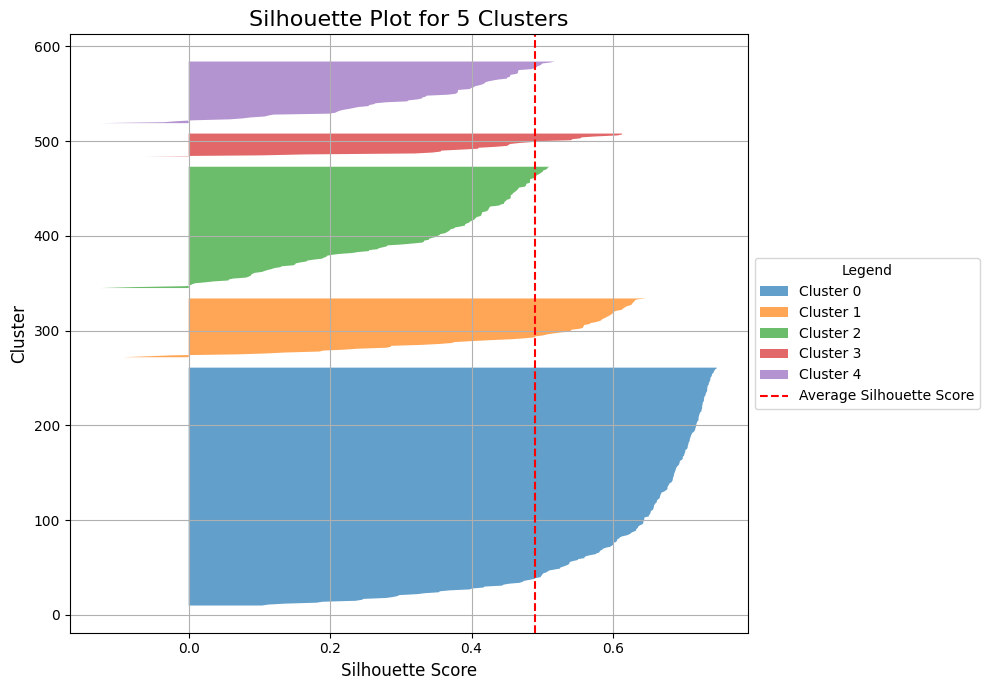

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
numeric_data = average_profiles 
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(numeric_data) 

# Computing silhouette scores
silhouette_vals = silhouette_samples(numeric_data, cluster_labels)

plt.figure(figsize=(10, 7))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()

    cluster_size = len(cluster_silhouette_vals)
    y_upper = y_lower + cluster_size

    # Adding the label for the legend
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7,
        label=f'Cluster {i}'
    )
    y_lower = y_upper + 10

# Adding average silhouette score line
avg_silhouette_score = silhouette_score(numeric_data, cluster_labels)
plt.axvline(
    x=avg_silhouette_score,
    color="red",
    linestyle="--",
    label="Average Silhouette Score"
)


plt.title(f"Silhouette Plot for {n_clusters} Clusters", fontsize=16)
plt.xlabel("Silhouette Score", fontsize=12)
plt.ylabel("Cluster", fontsize=12)

plt.legend(
    title="Legend",
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1, 0.5)  # Position legend outside plot
)

plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
print("The average silhouette_score is:", avg_silhouette_score)

The average silhouette_score is: 0.48966945958587843


#### 4. Putting data back into context

Based on the cluserting analysis performed, it can be suggested that cluster 0 (blue line) represents residential areas with morning and evening peaks. The demand with cluster 0 sharply increases around 06:00, reaching a morning peak around 08:00-09:00 as shown in the line graph above. After a small decline, demand peaks again in the evening, followed by a gradual decline into the night. 

Cluster 1 (orange line) represents areas with low, consistent demand throughout the day, with a small increase in the early morning and a small rise throughout the day. 

Cluster 2 is fairly cyclical with a peak in the evening suggesting power demand in a mixed residential or commerical area. There is a peak in the evening suggesting residential use of power in the evening such as use of TV's for entertainment etc. 

Cluster 3 shows an average high demand of power all throughout the day. This heavily suggests this substation is having power demanded from a commerical business area where power is needed throughout the entire day. 

Cluster 4 has a very high peak around 01:00 and then decreases to its lowest point around 06:00 as shown by the line graph. This suggests this cluster may represent serving a spealised area where heavy power is drawn at midnight such as entertainment or a server-upload in an industrial area. 

The silhouette score shown above is 0.4896 which therefore means that the clusters are faily distinct but not perfect. Values near 1 means that the observation would be appropriately clustered whereas values close to -1 means that it would be appropriate to cluster this observation in a neighbouring cluster. In this situation, our average silhouette score is closest to 0 meaning the observation is on the border of two clusters.

The largest cluster 0 has the largest number of substations. The silhouette scores for this cluster are mostly above the average silhouette scores which indicates that the substations in this cluster are well-separated from other clusters. Both clusters 1 and 2 have slightly lower silhouette scores compared to cluster 0. Substations in these clusters have have similar power usage patterns as can be obersved from the line graph above, indicating potential overlap. Cluster 3 which is the smallest cluster has most silhouette scores close to or above the average, suggesting substations in this cluster have distinct power usage patterns compared to other clusters. As can be seen in the line chart, cluster 3 maintains a high average power usage all throughout the day compared to other clusters. Cluster 4 has the smallest number of substations and relatively high silhouette scores. The substations in this cluster have a well defined pattern of power usage, starting with high power output at 1am and decreasing throughout the rest of the day with a small cyclical pattern in the evening.  